Cleaned dataset loaded successfully.


Dataset shape: (9994, 25)

Columns:
 ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'profit_margin', 'cost', 'year', 'month']

Data summary:



,row_id,postal_code,sales,quantity,discount,profit,profit_margin,cost,year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,0.120314,201.201105,2015.722233
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,0.466754,550.839414,1.123555
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-2.750000,0.554400,2014.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,0.075000,12.688200,2015.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,0.270000,41.664000,2016.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,0.362500,182.226300,2017.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000,24449.558400,2017.000000


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Profit Margin: 12.03%


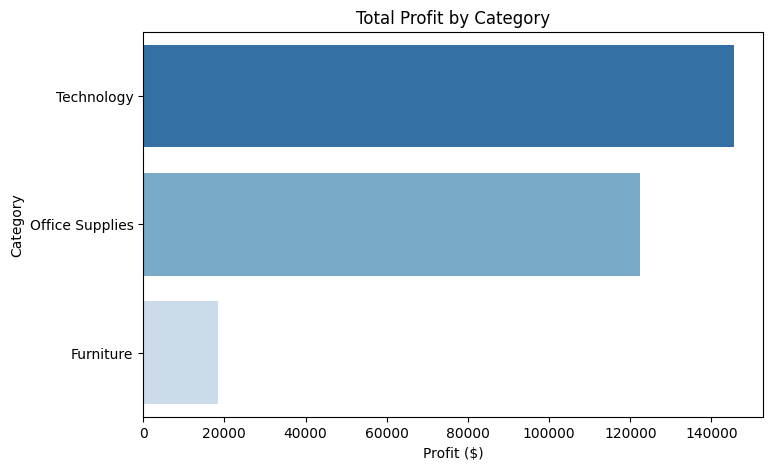

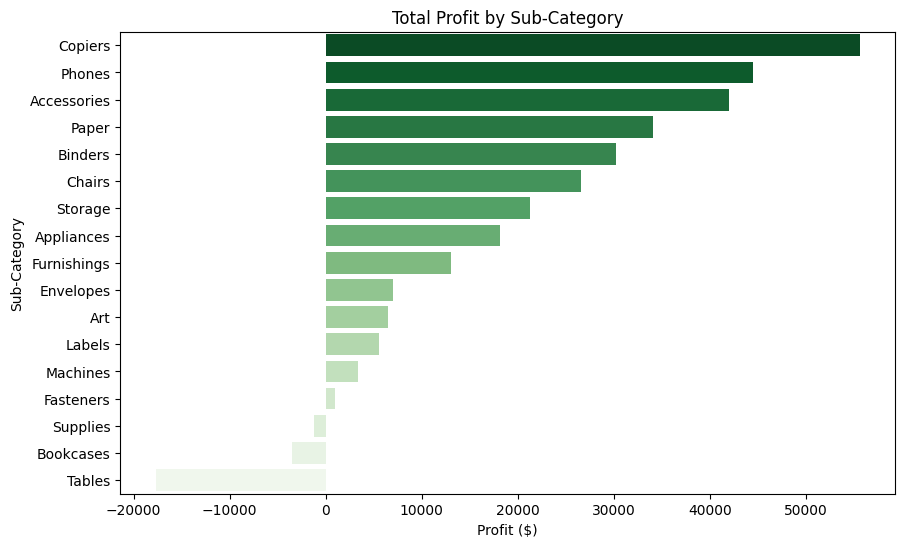

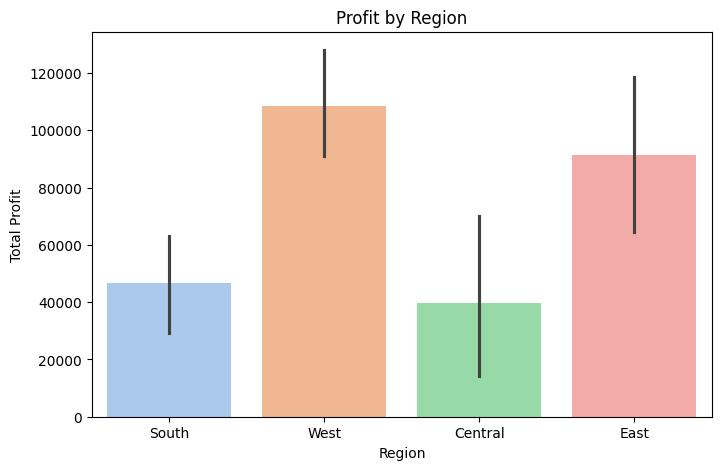

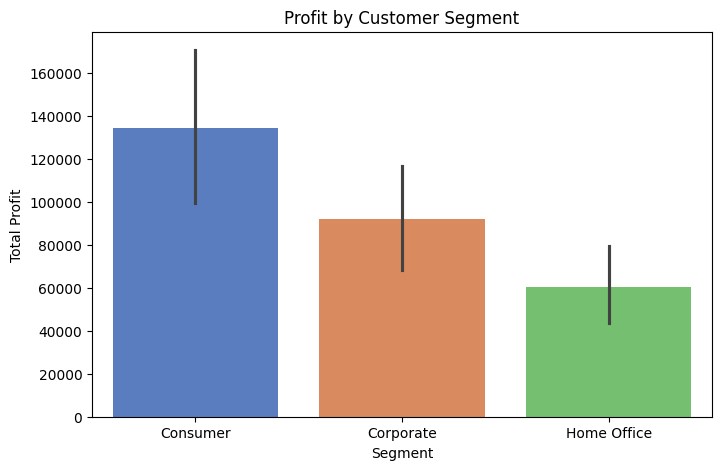

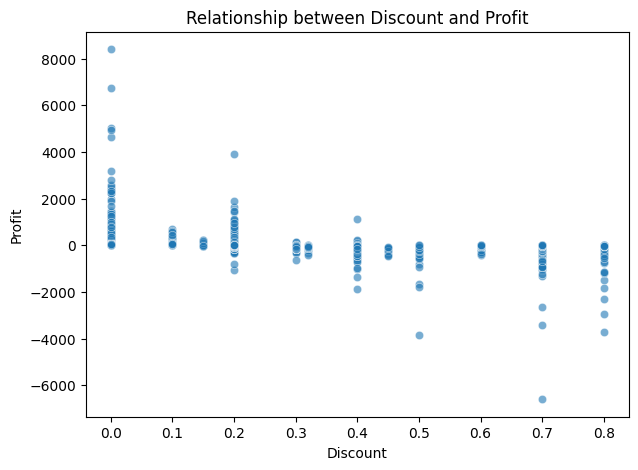

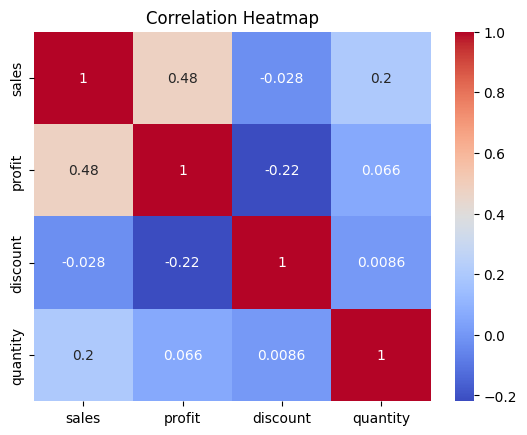

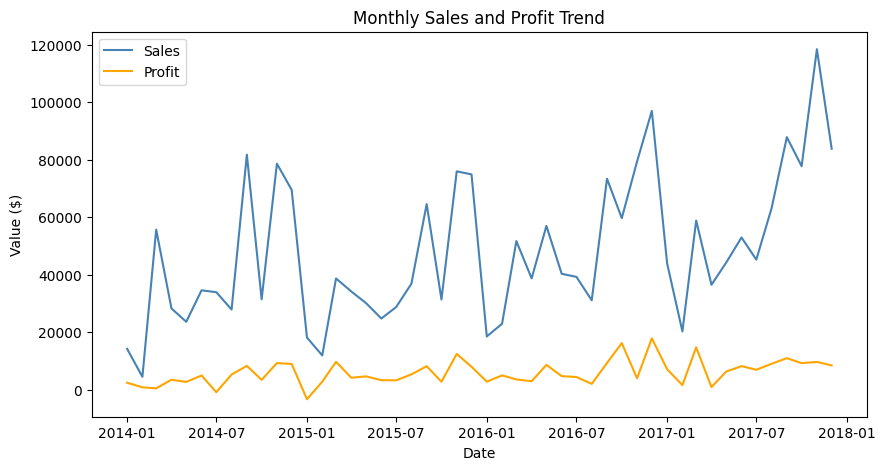

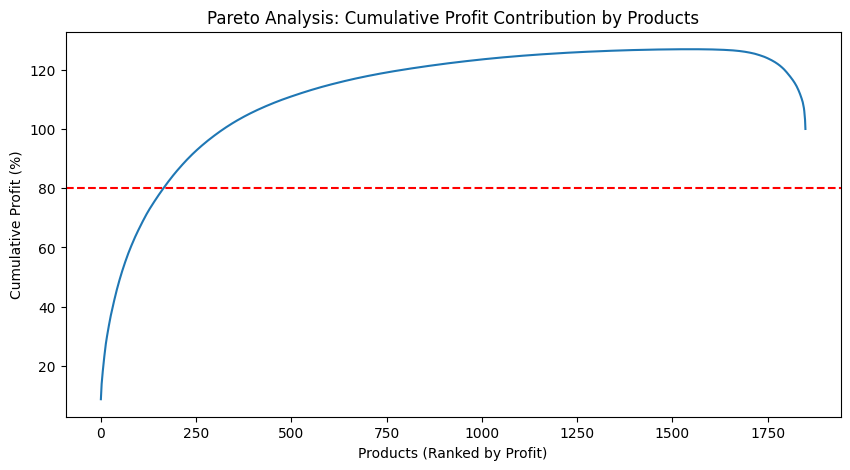


Number of products contributing to 80% of profit: 165
Percentage of total products: 8.92%

Key Insights:
- A small percentage of products contribute to most of the profit (Pareto principle).
- Some categories, despite high sales, yield low profit margins.
- Discounts above 20% tend to reduce profitability significantly.
- Regional profit variation suggests potential redistribution of stock or marketing spend.
- There is a clear seasonal pattern in sales and profit trends.

Processed dataset saved to: ../data/superstore_analysis_ready.csv


In [1]:
# 02_eda_profit_analysis.ipynb
# ProfitPulse: Data-Driven Cost Optimization for a Retail Chain
# Step 2: Exploratory Data Analysis and Profitability Insights


# 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


# 2. Load Cleaned Dataset

data_path = "../data/superstore_cleaned.csv"
df = pd.read_csv(data_path)
print("Cleaned dataset loaded successfully.\n")

df.head()


# 3. Basic Overview

print("\nDataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData summary:\n")
display(df.describe())


# 4. Sales and Profit Overview

total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
avg_margin = round(df['profit_margin'].mean() * 100, 2)

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_margin}%")

# -----------------------------
# 5. Profit by Category and Sub-Category
# -----------------------------
category_profit = df.groupby('category')['profit'].sum().sort_values(ascending=False)
subcategory_profit = df.groupby('sub-category')['profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_profit.values, y=category_profit.index, palette='Blues_r')
plt.title("Total Profit by Category")
plt.xlabel("Profit ($)")
plt.ylabel("Category")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=subcategory_profit.values, y=subcategory_profit.index, palette='Greens_r')
plt.title("Total Profit by Sub-Category")
plt.xlabel("Profit ($)")
plt.ylabel("Sub-Category")
plt.show()

# -----------------------------
# 6. Regional and Segment Analysis
# -----------------------------
plt.figure(figsize=(8,5))
sns.barplot(x=df['region'], y=df['profit'], estimator=sum, palette='pastel')
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=df['segment'], y=df['profit'], estimator=sum, palette='muted')
plt.title("Profit by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.show()

# -----------------------------
# 7. Discount Impact on Profit
# -----------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x='discount', y='profit', data=df, alpha=0.6)
plt.title("Relationship between Discount and Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

corr = df[['sales', 'profit', 'discount', 'quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 8. Time Series Trends
# -----------------------------
df['order_date'] = pd.to_datetime(df['order_date'])
monthly_sales = df.groupby(df['order_date'].dt.to_period('M')).agg({'sales':'sum','profit':'sum'}).reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], label='Sales', color='steelblue')
plt.plot(monthly_sales['order_date'], monthly_sales['profit'], label='Profit', color='orange')
plt.legend()
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Date")
plt.ylabel("Value ($)")
plt.show()

# -----------------------------
# 9. Pareto (80/20) Profitability Analysis
# -----------------------------
product_profit = df.groupby('product_name')['profit'].sum().sort_values(ascending=False).reset_index()
product_profit['cum_profit'] = product_profit['profit'].cumsum()
product_profit['cum_percent'] = 100 * product_profit['cum_profit'] / product_profit['profit'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(product_profit)), y=product_profit['cum_percent'])
plt.axhline(y=80, color='red', linestyle='--')
plt.title("Pareto Analysis: Cumulative Profit Contribution by Products")
plt.xlabel("Products (Ranked by Profit)")
plt.ylabel("Cumulative Profit (%)")
plt.show()

top_20_percent = product_profit[product_profit['cum_percent'] <= 80]
print(f"\nNumber of products contributing to 80% of profit: {len(top_20_percent)}")
print(f"Percentage of total products: {len(top_20_percent) / len(product_profit) * 100:.2f}%")

# -----------------------------
# 10. Key Findings Summary
# -----------------------------
print("\nKey Insights:")
print("- A small percentage of products contribute to most of the profit (Pareto principle).")
print("- Some categories, despite high sales, yield low profit margins.")
print("- Discounts above 20% tend to reduce profitability significantly.")
print("- Regional profit variation suggests potential redistribution of stock or marketing spend.")
print("- There is a clear seasonal pattern in sales and profit trends.")

# -----------------------------
# 11. Save Processed Data for Forecasting
# -----------------------------
output_path = "../data/superstore_analysis_ready.csv"
df.to_csv(output_path, index=False)
print(f"\nProcessed dataset saved to: {output_path}")
